In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd

In [3]:
from edisgo.edisgo import import_edisgo_from_files
from edisgo.network.timeseries import get_component_timeseries
import edisgo.flex_opt.charging_ev as cEV
import edisgo.flex_opt.optimization as opt

In [4]:
grid_dir = 'C:/Users/Anya.Heider/DistFlex/AllgaeuNetz/data'
ev_dir = 'C:/Users/Anya.Heider/DistFlex/AllgaeuNetz/data/' \
         'BEV_medium_00002_standing_times.csv'

In [28]:
timeindex = pd.date_range('2011-01-01', periods=8760, freq='h')
timeindex_charging = pd.date_range('2011-01-01', periods=8760, freq='15min')
storage_ts = pd.DataFrame({'Storage 1': 8760*[0]}, index=timeindex)

edisgo = import_edisgo_from_files(grid_dir)
get_component_timeseries(edisgo, timeseries_load='demandlib',
                timeseries_generation_fluctuating='oedb',
                timeseries_storage_units=storage_ts)
timesteps = edisgo.timeseries.timeindex[0:24]

In [11]:
charging_events

,car_type,bat_cap,location,use_case,netto_charging_capacity,SoC_start,SoC_end,chargingdemand,charge_start,charge_end,charge_time,charging_time_full_load
6,BEV_medium,100,0_work,private,45.0,0.948202,1.0,5.179755,213,245,33,0.460423
12,BEV_medium,100,6_home,private,9.9,0.901388,1.0,9.861229,378,397,20,3.984335
19,BEV_medium,100,6_home,private,9.9,0.929813,1.0,7.018689,573,600,28,2.835834
23,BEV_medium,100,6_home,private,9.9,0.939752,1.0,6.024800,628,672,45,2.434263


In [20]:
ev_data = pd.read_csv(ev_dir, index_col=0)
charging_events = ev_data.loc[ev_data.chargingdemand>0]
energy_bands = cEV.get_ev_timeseries(charging_events, mode='single_week')
energy_bands.loc[energy_bands.upper!=energy_bands.lower]

C:\Users\Anya.Heider\DistFlex\eDisGo_mirror\edisgo\flex_opt\charging_ev.py:1460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return get_ev_flexibility_bands(ev_data, ev_tech_data)


,lower,upper,power
213,0.000000,5.179755,50.0
214,0.000000,5.179755,50.0
215,0.000000,5.179755,50.0
216,0.000000,5.179755,50.0
217,0.000000,5.179755,50.0
218,0.000000,5.179755,50.0
219,0.000000,5.179755,50.0
220,0.000000,5.179755,50.0
221,0.000000,5.179755,50.0
222,0.000000,5.179755,50.0


In [24]:
timeindex_charging = pd.date_range('2011-01-01', periods=8760, freq='15min')
energy_band_ev = energy_bands.iloc[210:]
energy_band_ev.set_index(timeindex_charging[0:len(energy_band_ev)], inplace=True)
energy_band_ev.upper = energy_band_ev.upper.astype(float)
energy_band_ev.lower = energy_band_ev.lower.astype(float)
energy_band_ev = energy_band_ev.resample('h').min()/1e3
energy_band_charging_point = energy_band_ev.rename(columns=({
    'lower': 'lower_ChargingPoint',
    'upper': 'upper_ChargingPoint',
    'power': 'power_ChargingPoint'
}))

In [32]:
model = opt.setup_model(edisgo, timesteps=timesteps, energy_band_charging_points=energy_band_charging_point)

C:\Users\Anya.Heider\DistFlex\eDisGo_mirror\edisgo\flex_opt\optimization.py:256: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  return model.soc[storage, time] == model.soc[storage, time - 1] - \
C:\Users\Anya.Heider\DistFlex\eDisGo_mirror\edisgo\flex_opt\optimization.py:258: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  model.charging[storage, time - 1]
C:\Users\Anya.Heider\DistFlex\eDisGo_mirror\edisgo\flex_opt\optimization.py:285: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  model.energy_level_ev[charging_point, time - 1] + \
C:\Users\Anya.Heider\DistFlex\eDi

In [33]:
x_charge, soc, x_charge_ev, energy_band_cp = opt.optimize(model, 'glpk')

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmphi4folwb.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpfl09kno9.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpyvd91av1.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpyvd91av1.pyomo.lp'...
338 rows, 339 columns, 814 non-zeros
2176 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpfl09kno9.glpk.glp'...
1973 lines were written
GLPK Simplex Optimizer, v4.65
338 rows, 339 columns, 814 non-zeros
Preprocessing...
175 rows, 135 columns, 393 non-zeros
Scaling...
 A: min|aij| =  2.305e-02  max|aij| =  1.000e+00  ratio =  4.338e+01
GM: min|aij| =  8.411e-01  max|aij| =  1.189e+00  ratio =  1.413e+00
EQ: min|aij| =  7.219e-01  max|aij| =  1.000e+00  ratio =  1.385e+00
Constructing initial basis...
Size of triangular part is 175
      0: obj =   0.000000000e+00 inf =   2.632e-01 (25)

<AxesSubplot:>

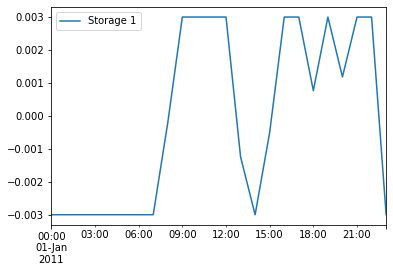

In [35]:
x_charge.plot()

<AxesSubplot:>

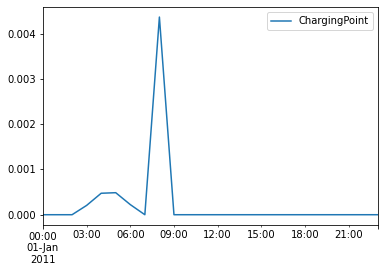

In [36]:
x_charge_ev.plot()